In [1]:
import json
import pandas as pd

In [2]:
file = open("tweets_DM.json", 'r', encoding='utf-8')
papers = []
for line in file.readlines():
    dic = json.loads(line)
    papers.append(dic)
df = pd.DataFrame.from_dict(pd.json_normalize(papers), orient='columns')
df

,_score,_index,_crawldate,_type,_source.tweet.hashtags,_source.tweet.tweet_id,_source.tweet.text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,2015-05-12 12:51:52,tweets,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,2017-10-02 17:54:04,tweets,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,2016-10-10 11:04:32,tweets,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,2016-09-02 14:25:06,tweets,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [3]:
df = df.set_axis(['score', 'index', 'crawldate', 'type', 'hashtag', 'tweet_id', 'tweet_text'], axis=1)
df = df.drop(columns=['score', 'index', 'crawldate', 'type', 'hashtag'])
df

,tweet_id,tweet_text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [4]:
df_emotion = pd.read_csv("./emotion.csv") 
df_emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [5]:
df_concat=pd.merge(df, df_emotion, on='tweet_id')
df_concat

,tweet_id,tweet_text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,0x2cbca6,there's currently two girls walking around the...,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_concat['emotion'])
y

array([1, 5, 3, ..., 4, 4, 4])

In [39]:
y = pd.DataFrame(y)
y

,0
0,1
1,5
2,3
3,4
4,1
...,...
1455558,4
1455559,4
1455560,4
1455561,4


In [40]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(df_concat['tweet_text'], y)

In [12]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import keras

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_X)

X_train = BOW_500.transform(train_X)

X_val = BOW_500.transform(val_X)

## check dimension
X_train.shape

Using TensorFlow backend.
/home/hsnl-iot/anaconda3/envs/seed_tf/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


(1091672, 500)

In [41]:
y_train = train_y
y_val = val_y

In [42]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_val.shape)
print('y_test.shape: ', y_val.shape)

X_train.shape:  (1091672, 500)
y_train.shape:  (1091672, 1)
X_test.shape:  (363891, 500)
y_test.shape:  (363891, 1)


In [59]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelDecoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_val.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_val.shape)


ImportError: cannot import name 'LabelDecoder' from 'sklearn.preprocessing' (/home/hsnl-iot/anaconda3/envs/seed_tf/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [43]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  8


In [17]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
_________________________________________________________________
softmax_1 (Softmax)          (None, 8)                 0   

In [44]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_val, y_val))
print('training finish')

ValueError: Error when checking target: expected softmax_1 to have shape (8,) but got array with shape (1,)

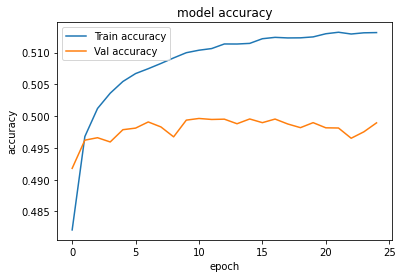

In [21]:
# Answer here
# summarize history for accuracy
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='upper left')
plt.show()

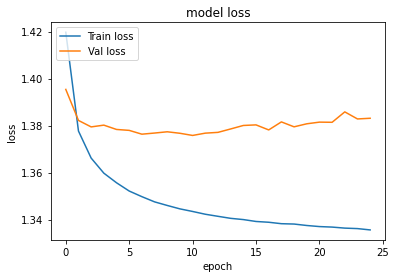

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper left')
plt.show()

In [23]:
df_identification = pd.read_csv("./data_identification.csv") 

In [24]:
df_test=pd.merge(df, df_identification, on='tweet_id')
df_test

,tweet_id,tweet_text,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,0x28b412,"Confident of your obedience, I write to you, k...",test
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test
...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,test
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",train


In [25]:
df_test = df_test[df_test["identification"]=="test"]
df_test.reset_index(drop=True, inplace=True)
df_test = df_test.drop(columns=["identification"])
df_test

,tweet_id,tweet_text
0,0x28b412,"Confident of your obedience, I write to you, k..."
1,0x2de201,"""Trust is not the same as faith. A friend is s..."
2,0x218443,When do you have enough ? When are you satisfi...
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
4,0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th..."
411968,0x2a980e,"""There is a lad here, which hath five barley l..."
411969,0x316b80,When you buy the last 2 tickets remaining for ...
411970,0x29d0cb,I swear all this hard work gone pay off one da...


In [35]:
X_test = BOW_500.transform(df_test['tweet_text'])
predict_y = model.predict(X_test)
result = label_decode(label_encoder, predict_y)
result

In [63]:
result_df = pd.DataFrame(result)
result_df

,0
0,anticipation
1,trust
2,sadness
3,joy
4,trust
...,...
411967,joy
411968,anticipation
411969,sadness
411970,joy


In [64]:
result_df = pd.concat([df_test['tweet_id'], result_df], axis=1)
result_df.columns = ['id','emotion']
result_df

,id,emotion
0,0x28b412,anticipation
1,0x2de201,trust
2,0x218443,sadness
3,0x2939d5,joy
4,0x26289a,trust
...,...,...
411967,0x2913b4,joy
411968,0x2a980e,anticipation
411969,0x316b80,sadness
411970,0x29d0cb,joy


In [65]:
result_df.to_csv("./DM_DL_all.csv", index=False)